In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.46959,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.42472,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.56760,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.78700,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.55410,2.27110,0.37425,2.17860,NaN,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,NaN,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.37730,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.34120,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.09870,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	40
float64		column 3	13
float64		column 4	66
float64		column 5	52
float64		column 6	14
float64		column 7	39
float64		column 8	26
float64		column 9	52
float64		column 10	26
float64		column 11	39
float64		column 12	52


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,748.000000,760.000000,787.000000,734.000000,748.000000,786.000000,761.000000,774.000000,748.000000,774.000000,761.000000,748.000000
mean,1.491126,1.255512,1.982116,1.953490,1.999630,2.001901,1.961691,1.998456,2.008151,1.989182,1.947166,1.955283
std,2.706545,3.612914,1.140976,1.146291,1.147310,1.139329,1.156528,1.127680,1.126141,1.145044,1.173899,1.114614
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.375128,-0.695220,1.025950,0.980120,1.002450,0.990855,0.962440,1.003225,1.095375,1.039075,0.910270,1.004000
50%,0.888675,0.560365,1.968700,1.936800,2.036500,2.001300,1.951200,2.006050,1.999100,2.000450,1.912900,1.938500
75%,3.954175,4.471600,2.921950,2.934100,2.945525,2.990800,2.961300,2.919125,2.985450,2.977550,2.954100,2.860125
max,6.771900,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.988300,3.998800,3.990900,3.998300


<AxesSubplot:>

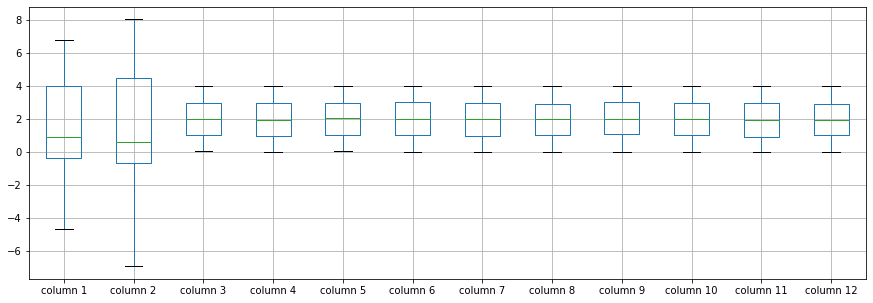

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.491126
column 2     1.255512
column 3     1.982116
column 4     1.953490
column 5     1.999630
column 6     2.001901
column 7     1.961691
column 8     1.998456
column 9     2.008151
column 10    1.989182
column 11    1.947166
column 12    1.955283
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.432728,-0.020040,0.001181,0.027653,0.034514,-0.038144,0.024382,-0.022428,-0.026213,0.059156,0.018280
column 2,-0.432728,1.000000,-0.030580,-0.038002,-0.013780,-0.014354,0.029747,-0.018668,0.016663,-0.023180,-0.067453,0.027215
column 3,-0.020040,-0.030580,1.000000,-0.054914,0.093097,-0.013115,0.033708,-0.017367,-0.019045,-0.004736,-0.043841,0.000060
column 4,0.001181,-0.038002,-0.054914,1.000000,-0.011976,-0.045829,0.042284,0.035463,-0.032518,0.018434,0.056578,-0.020838
column 5,0.027653,-0.013780,0.093097,-0.011976,1.000000,0.047060,0.035329,-0.002380,-0.012190,-0.013870,0.004700,0.015803
column 6,0.034514,-0.014354,-0.013115,-0.045829,0.047060,1.000000,-0.065813,0.019300,0.027188,0.017118,-0.018273,0.000284
column 7,-0.038144,0.029747,0.033708,0.042284,0.035329,-0.065813,1.000000,-0.040869,-0.021341,-0.031837,0.015185,-0.004546
column 8,0.024382,-0.018668,-0.017367,0.035463,-0.002380,0.019300,-0.040869,1.000000,-0.071071,-0.057342,0.021472,-0.041360
column 9,-0.022428,0.016663,-0.019045,-0.032518,-0.012190,0.027188,-0.021341,-0.071071,1.000000,0.043198,-0.005443,-0.024950
column 10,-0.026213,-0.023180,-0.004736,0.018434,-0.013870,0.017118,-0.031837,-0.057342,0.043198,1.000000,-0.078126,0.080357


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+73,12+73+73,12+73+73+73,12+73+73,12+73,12], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.052774658203123
Epoch: 1 , loss: 27.874265022277832
Epoch: 2 , loss: 27.627342529296875
Epoch: 3 , loss: 26.54353282928467
Epoch: 4 , loss: 22.949565238952637
Epoch: 5 , loss: 21.95005359649658
Epoch: 6 , loss: 21.370503273010254
Epoch: 7 , loss: 21.10306457519531
Epoch: 8 , loss: 20.849873733520507
Epoch: 9 , loss: 20.402939796447754
Epoch: 10 , loss: 20.299178047180177
Epoch: 11 , loss: 19.919644393920898
Epoch: 12 , loss: 19.946441688537597
Epoch: 13 , loss: 19.5227689743042
Epoch: 14 , loss: 19.50808609008789
Epoch: 15 , loss: 19.39324337005615
Epoch: 16 , loss: 19.373519020080565
Epoch: 17 , loss: 19.17701389312744
Epoch: 18 , loss: 19.01728099822998
Epoch: 19 , loss: 18.986789779663084
Epoch: 20 , loss: 18.840634918212892
Epoch: 21 , loss: 18.86631832122803
Epoch: 22 , loss: 18.84087589263916
Epoch: 23 , loss: 18.770003852844237
Epoch: 24 , loss: 18.722451705932617
Epoch: 25 , loss: 18.9162614

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    2.755064
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.121865,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.311071,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(46.12735295888548, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.18583103603335496

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.46959,0.67908,3.43440,2.79240,2.776300,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.42472,1.17850,1.68020,1.38880,3.216700,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.56760,1.48240,0.92160,2.64240,1.518700,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.78700,2.59570,2.89330,1.53750,0.999420,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.55410,2.27110,0.37425,2.17860,1.192135,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,1.38184,2.07470,0.80304,3.22290,3.493300,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.37730,2.28870,0.39613,2.39610,2.463500,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.34120,1.53700,1.22560,0.74027,2.495400,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.09870,3.42430,0.81081,3.72700,1.187900,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NW_5(imp).xlsx", index=False, header=False)